In [0]:
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report



In [4]:
uploaded = files.upload()
import io
df =pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']))


Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,0
1,2,45,19,34,90089,3,1.5,1,0,0
2,3,39,15,11,94720,1,1.0,1,0,0
3,4,35,9,100,94112,1,2.7,2,0,0
4,5,35,8,45,91330,4,1.0,2,0,0


In [6]:
#Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of
#cols & types of variables (continuous, categorical etc.)? (1 MARK)

df.shape  # No of Rows and columns

(5000, 10)

In [7]:
df.info()  
# This wil give the type  of columns placed inside the data set
# As we can see from info data types of all the features are int or float 
# Categorical: Family,Education,Personal Loan are Categorical Features.
#Continuous: Zip Code,Age(Discrete),CCAvg,Income are contiuous features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
ID               5000 non-null int64
Age              5000 non-null int64
Experience       5000 non-null int64
Income           5000 non-null int64
ZIP Code         5000 non-null int64
Family           5000 non-null int64
CCAvg            5000 non-null float64
Education        5000 non-null int64
Mortgage         5000 non-null int64
Personal Loan    5000 non-null int64
dtypes: float64(1), int64(9)
memory usage: 390.8 KB


In [8]:
#Calculate five-point summary for numerical variables
df.describe()
# This will give us Max,Min,median(50%),Q1(25%),Q3(75%) for each numerical variables.Hence Five point Summary

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000


In [19]:
#Summarize observations for categorical variables – no. of categories, % observations in each
#category. (1 mark)
cat_features  = ['Family','Education','Personal Loan']
for i in cat_features:
  print(f'No. of categories for {i}: {df[i].nunique()}')
  print((df[i].value_counts()/df[i].shape[0])*100)


No. of categories for Family: 4
1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64
No. of categories for Education: 3
1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64
No. of categories for Personal Loan: 2
0    90.4
1     9.6
Name: Personal Loan, dtype: float64


In [20]:
#Check for defects in the data such as missing values, null, outliers, etc and also check for
#class imbalance. (2 marks)

df.isna().sum() # There are no missing values in the given data set.

ID               0
Age              0
Experience       0
Income           0
ZIP Code         0
Family           0
CCAvg            0
Education        0
Mortgage         0
Personal Loan    0
dtype: int64

In [21]:
df.isnull().sum() # There are no null values in the given data set.

ID               0
Age              0
Experience       0
Income           0
ZIP Code         0
Family           0
CCAvg            0
Education        0
Mortgage         0
Personal Loan    0
dtype: int64

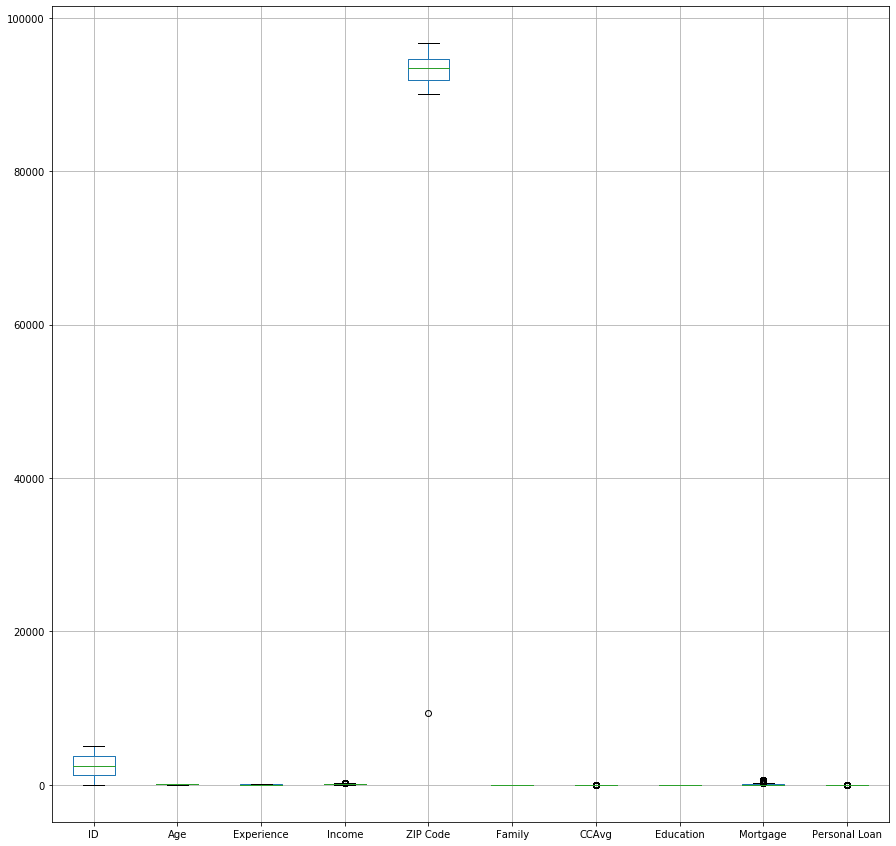

In [27]:
plt.figure(figsize=(15,15))
df.boxplot()
# There are outliers in the data set : Income,Mortgage,CCAvg we have outliers.


In [33]:
#a. Fix the defects found above and do appropriate treatment if any. (3 marks)

q1 = df['CCAvg'].quantile(0.25)
q3 = df['CCAvg'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['CCAvg']=df['CCAvg'].apply(lambda x: upper_limit if x>upper_limit else x)
df['CCAvg']=df['CCAvg'].apply(lambda x:lower_limit if x<lower_limit else x)

5.2 -2.0


In [34]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['Income']=df['Income'].apply(lambda x: upper_limit if x>upper_limit else x)
df['Income']=df['Income'].apply(lambda x:lower_limit if x<lower_limit else x)

186.5 -49.5


In [35]:
q1 = df['Mortgage'].quantile(0.25)
q3 = df['Mortgage'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
print(upper_limit,lower_limit)
df['Mortgage']=df['Mortgage'].apply(lambda x: upper_limit if x>upper_limit else x)
df['Mortgage']=df['Mortgage'].apply(lambda x:lower_limit if x<lower_limit else x)

252.5 -151.5


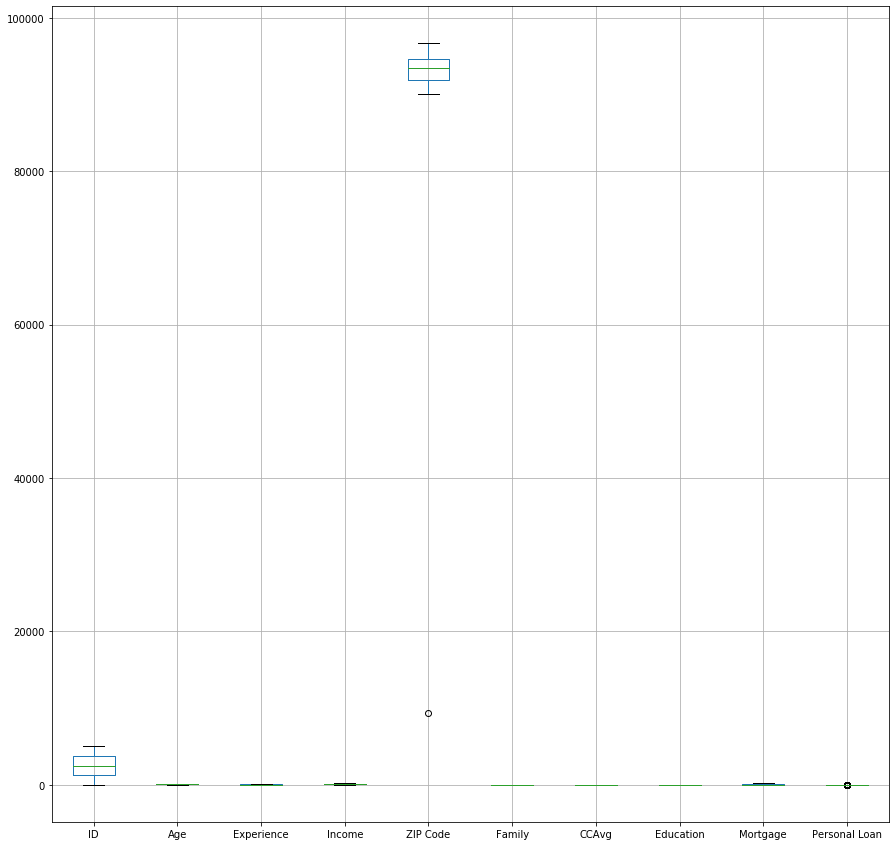

In [36]:
plt.figure(figsize=(15,15))
df.boxplot()

In [39]:
print((df['Personal Loan'].value_counts()/df.shape[0])*100)
# Data is imbalanced as we can see that 90% of personal loan have class 1 and only about 10% of the data is from class 0.

0    90.4
1     9.6
Name: Personal Loan, dtype: float64


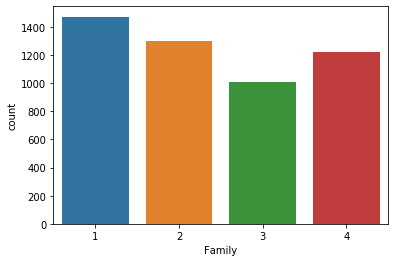

In [52]:
#Visualize the data using relevant plots. Find out the variables which are highly correlated
#with Target? (3 marks)
sns.countplot(df['Family'])

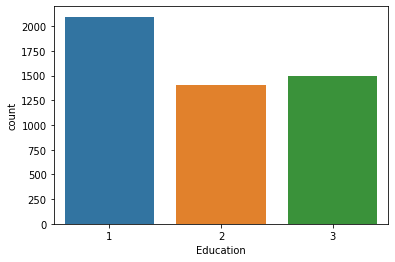

In [46]:
sns.countplot(df['Education'])

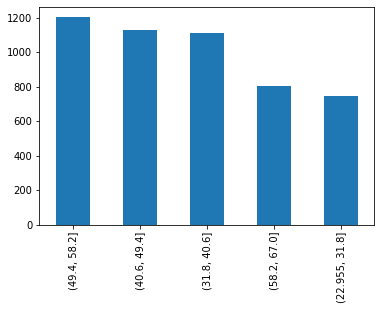

In [58]:
df['Age'].value_counts(bins=5).plot.bar()

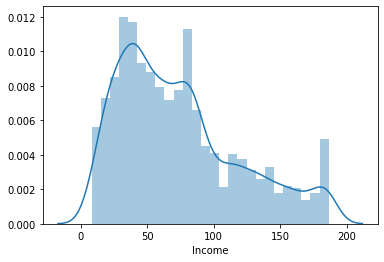

In [60]:
sns.distplot(df['Income'])
#df['Income'].groupby(df['Personal Loan']).plot.bar()

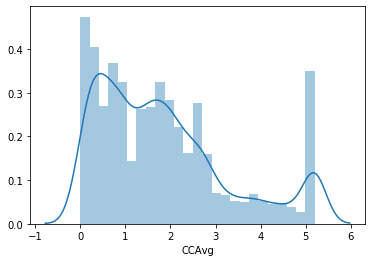

In [56]:
sns.distplot(df['CCAvg'])

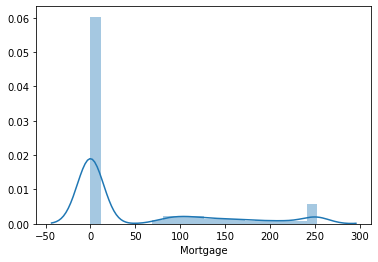

In [57]:
sns.distplot(df['Mortgage'])

In [0]:
# As we can see from above that :
# Mortgage is highly skewed and also bimodal thus distribution is not normal
#Income is also bimodal and has different clusters inside it.
# Most of the people are from 49-58 age group
#Education has highly belongingness to class 1
#Family has highly belongingness to class 1

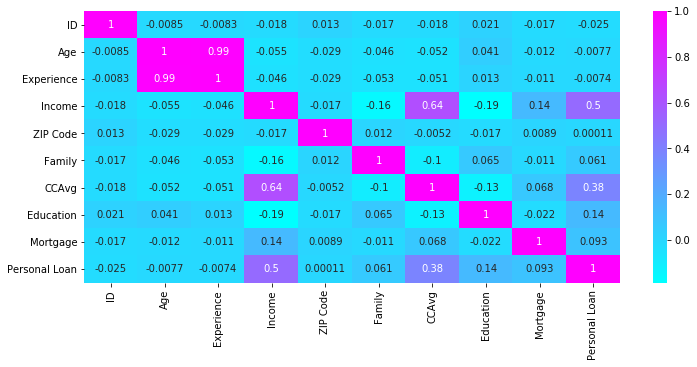

In [61]:

import seaborn as sns
corr  = df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr,cmap='cool',annot=True)

## As we can see that Income is  positively correlated with personal loan .
## CCAVg is highly correlated with Income.
## CCAvg is  positively correlated with personal loan .



In [0]:
#Do you want to exclude some variables from the model based on this analysis? What other
#actions will you take?

### As we can see that Zip code and ID are not adding any significance to the target variable . Thus we can exclude these from our analysis.
### As the numerical values are of different scale we can have standardisation or transformation of the numerical values.
### Splitting the data into train test and apply Standard Scaler.
### Feature selection will also be done for the better modelling .


In [0]:
df2 = df.copy()

In [0]:
bank = df2.drop(['ZIP Code','ID'],axis=1)

### SMOTE has been applied on Imbalanced Data for proper modelling

In [80]:
X=bank.drop('Personal Loan',axis=1)
y=bank[['Personal Loan']]
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 4520), (1, 4520)]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Splitting of the data

In [0]:
#Split dataset into train and test (70:30). Are both train and test representative of the overall
#data? How would you ascertain this statistically? (2 marks)
cols= bank.columns
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y,train_size = 0.3,random_state=0)


### Scaling of the data using Standard Scaler

In [88]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6
0,57.000000,32.000000,135.000000,3.000000,4.800000,2.0,0.000000
1,32.750256,8.000000,132.996929,3.249744,5.200000,2.0,104.244625
2,54.000000,29.000000,58.000000,4.000000,1.300000,3.0,0.000000
3,58.984333,33.312444,186.500000,3.015667,5.035944,3.0,196.953000
4,29.000000,5.000000,44.000000,3.000000,0.100000,2.0,0.000000


In [0]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

a=X_train.columns

scaled_bank_data=pd.DataFrame(sc.fit_transform(X_train),columns=a)


In [92]:
##Fit a base model and explain the reason of selecting that model. Please write your key
#observations. (3 marks)
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression()

model=logi.fit(scaled_bank_data,y_train)
model.score(scaled_bank_data,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8925410872313527

### As the problem is of 2-class and that means we can use CART algorithm or binary split.
### To keep the complexity low and good evaluation metricas . Logistic Model will be good bit for the base modelling.
### Confusion Matrix and Other Calssification Reports are also available for cross valiadation.
### Score is 89 % which means training data has been able to explain 89% of varations.

In [93]:
from sklearn.preprocessing import StandardScaler
X_test = pd.DataFrame(X_test)
X_test.head()
sc=StandardScaler()

a=X_test.columns

scaled_bank_data_test=pd.DataFrame(sc.fit_transform(X_test),columns=a)
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression()

model=logi.fit(scaled_bank_data_test,y_test)
model.score(scaled_bank_data_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8849557522123894

### Test Score is Also around 89% thus we can say that our test model is close to the training score

In [94]:
##Evaluate the model built using Precision, Recall and F1 Score and what will be the
#optimization objective keeping in mind the problem statement.
X_pred = logi.predict(scaled_bank_data)

y_pred = logi.predict(scaled_bank_data_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, X_pred)
confusion_matrix
print(classification_report(y_train, X_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3184
           1       0.89      0.90      0.89      3144

    accuracy                           0.89      6328
   macro avg       0.89      0.89      0.89      6328
weighted avg       0.89      0.89      0.89      6328

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1336
           1       0.88      0.90      0.89      1376

    accuracy                           0.88      2712
   macro avg       0.89      0.88      0.88      2712
weighted avg       0.89      0.88      0.88      2712



### As we can infer from the Classification report and Confusion Matrix from train and test thaat they are similar thus Model is getting trained properly.

## People having high expereience and income have accepted the personal loan


In [96]:
##. How do you improve the accuracy of the model? Write clearly the changes that you will make
#before re-fitting the model. Fit the final model. (5 marks)


# We have to try different algorithms with different parameters for increasing the accuracy .

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold,cross_val_score

models = []

models.append(('LR', LogisticRegression()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))



results = []
names = []
x=0
c=0
for name, model in models:
   c=0
   kfold = KFold(n_splits=10, random_state=0)
   cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
   results.append(cv_results)
   names.append(name)
   print(name,cv_results.mean(), cv_results.std())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR 0.8775442477876106 0.006470056998181289
KNN 0.9210176991150443 0.05144507041295632
CART 0.9902654867256638 0.003728384855387801
NB 0.8731194690265488 0.008597773253019044


In [0]:
##Write down a business interpretation/explanation of the model – which variables are affecting
#the target the most and explain the relationship. Feel free to use charts or graphs to explain.
#(2 marks)

####As we can See that following features:
1. Income
2. CCAVg
3. Experience
###These are highly significant,
###Thus we can target customers with high experience ,good CCAvg and ###substantial Income over the past years for our campaign.
####We can target these customers as they have high chances of acceepting ###personal loans in the future .
###Also we can target new customers with similar features.